# Równania różniczkowe w technice - projekt 

## Temat: Zagadnienie n-ciał

#### Autorzy:
**Marzena Rybak, 268951**

**Małgorzata Kowalczyk, 262295**

## Wstęp

Problem n-ciał można opisać jako problem ruchu ciał, które mają pewne położenie, mogą mieć prędkość początkową oraz oddziałują ze sobą tylko poprzez siłę grawitacji. W rzeczywistości z taką sytuacją możemy mieć do czynienia w obliczeniach astronomicznych dla układów — planety i gwiazdy oddziałują ze sobą, a wszystkie inne siły są na tyle małe, że możemy je zaniedbać.

Zachowanie dwóch obiektów oddziałujących ze sobą za pomocą grawitacji Newtona jest dobrze zrozumiałe i łatwe do przeanalizowania. Jednakże, gdy zwiększamy liczbę obiektów w naszym układzie, problem natychmiast staje się o wiele bardziej skomplikowany. W historii wielokrotnie próbowano znaleźć ogólne rozwiązanie problemu n-ciał. Pod koniec XIX wieku król Szwecji zaoferował nagrodę dla każdego, kto znajdzie ogólne rozwiązanie problemu n-ciał. Francuski uczony, Henri Poincaré wykazał, że równania ruchu dla więcej niż dwóch ciał grawitacyjnych nie są w ogólności całkowalne. Problem nie został rozwiązany, lecz jury przyznało nagrodę Poincarému za jego pierwsze pomysły dotyczące tego, co później nazwano teorią chaosu. <a href=https://oxford.universitypressscholarship.com/view/10.1093/oso/9780198786399.001.0001/oso-9780198786399-chapter-13>[1]</a>

Obecnie zrozumienie problemu n-ciał stało się o wiele bardziej wykonalne dzięki postępowi technologicznemu i związanemu z nim rozwojowi fizyki obliczeniowej. Chociaż nie ma analitycznego rozwiązania problemu n-ciał dla 3 lub więcej ciał, możemy użyć metod obliczeniowych do modelowania i lepszego zrozumienia zachowań między oddziaływającymi ciałami.

Ten temat został przez nas wybrany, ponieważ uważamy, że niezwykle fascynujące jest poznanie i zrozumienie ruchów, które dzieją się we Wszechświecie. Daje on również możliwość przedstawienia przykładów w postaci animacji, które dają namacalny pogląd, jak to wszystko działa i są ciekawą formą przedstawienia opracowywanych zagadnień.

Przy opracowaniu tematu korzystałyśmy z już zaimplementowanych numerycznych metod rozwiązywania równań różniczkowych w Mathematice, jak i metod zaimplementowanych przez nas w Pythonie. Metody numeryczne są w tym przypadku niezbędne, ponieważ problem n-ciał nie zawsze jest możliwy do rozwiązania analitycznie, a jeszcze częściej problem ten jest po prostu skomplikowany, stąd efektywność i użyteczność prowadzenia symulacji.

Nasze zagadnienie rozpatrujemy w przestrzeni dwuwymiarowej z powodu lepszej reprezentacji na płaszczyźnie, jaką jest nasza praca. Założymy również dla uproszczenia, że badane przez nas ciała są punktami materialnymi (mają masę, ale nie mają objętości) oraz mogą przenikać przez siebie (nie dochodzi do zderzeń).

## Część teoretyczna *[2]*

Najważniejszymi zagadnieniami fizycznymi z jakich będziemy korzystać są prawa powszechnego ciążenia i równania opisujące dynamikę położenia ciał. Mamy więc: 

$\vec{F}=m\vec{a}$ - II prawo dynamiki Newtona,

$\vec{F}=G\frac{m_1m_2}{r^2}\vec{e}$ - prawo powszechnego ciążenia,

gdzie $\vec{e}$ to jednostkowy wektor leżący na prostej łączącej środki mas obu ciał.

Przyrównując podane wzory ze sobą, otrzymujemy $$\vec{a} = \frac{F_1}{m_1} = G\frac{m_2}{r^2}\vec{e}.$$
$\vec{x}(t)=x_0+v_0t+\vec{v}(t)t+\vec{a}(t)t^2$ - równanie ruchu,

gdzie $\vec{v}(t)=\vec{x}'(t), \vec{a}(t)=\vec{x}''(t).$

Z powyższych zależności możemy otrzymać równanie opisujące tor ruchu i-tego ciała pod wpływem sił grawitacji pochodzących od pozostałych ciał:
$$\vec{x}''_i(t)=\sum_{1\leq j\leq n, i \neq j}Gm_j\frac{\vec{x}_j(t)-\vec{x}_i(t)}{||x_j(t)-x_i(t)||^3}.$$

Dla 2 ciał daje to nam układ równań:
$$\left\{\begin{matrix}
\vec{x}''_1=Gm_2\frac{\vec{x}_2-\vec{x}_1}{(x_2-x_1)^3}
 \\ \vec{x}''_2=Gm_1\frac{\vec{x}_1-\vec{x}_2}{(x_1-x_2)^3}
\end{matrix}\right..$$

Natomiast dla 3 ciał:
$$\left\{\begin{matrix}
\vec{x}''_1=Gm_2\frac{\vec{x}_2-\vec{x}_1}{(x_2-x_1)^3}+Gm_3\frac{\vec{x}_3-\vec{x}_1}{(x_3-x_1)^3}
 \\ \vec{x}''_2=Gm_1\frac{\vec{x}_1-\vec{x}_2}{(x_1-x_2)^3}+Gm_3\frac{\vec{x}_3-\vec{x}_2}{(x_3-x_2)^3}
 \\ \vec{x}''_3=Gm_2\frac{\vec{x}_2-\vec{x}_3}{(x_2-x_3)^3}+Gm_1\frac{\vec{x}_1-\vec{x}_3}{(x_1-x_3)^3}
\end{matrix}\right..$$

#### Prędkość ucieczki

Prędkość ucieczki (II prędkość kosmiczna) to minimalna prędkość, jaką trzeba nadać ciału, aby było w stanie opuścić pole grawitacyjne określonego obiektu. Oznacza to, że ciało osiadające prędkość większą lub równą prędkości ucieczki może nigdy nie powrócić do otoczenia danego obiektu i cały czas się od niego oddalać.

## Implementacja metod numerycznych

### Metoda 1 <a href=https://tutorial.math.lamar.edu/classes/de/eulersmethod.aspx>[3]</a>

In [34]:
def getAcc(mass, pos, N, dims, G=6.67*10**-11, softening=0.1):
    a = np.zeros((N, dims))
    
    for i in range(N):
        for j in range(N):
            diffs = np.asarray([pos[j, dim] - pos[i, dim] for dim in range(dims)])
            inv_r3 = (np.sum(diffs**2) + softening**2)**(-1.5)
            a[i] += G * (diffs * inv_r3) * mass[j]
    
    return a

def solve(pos, mass, vel, t, dt=.01, G=6.67*10**-11, softening=0.1):
    N = pos.shape[0]
    dims = pos.shape[1]
    acc = getAcc(mass, pos, N, dims, G, softening)
    
    steps = int(t/dt)
    for _ in range(steps):
        acc = getAcc(mass, pos, N, dims, G, softening)

        vel += acc * dt
        pos += vel * dt
    return pos

#### Krótko o metodzie 1

Metoda 1 jest metodą rzędu I, zwana metodą Eulera.

Przyśpieszenie wyliczamy przy pomocy funkcji getAcc(). Następnie, mając znane przyspieszenie, kolejnym krokiem jest obliczenie prędkości. 
Wyliczamy ją przez pomnożenie przyspieszenia przez krok czasowy i dodanie go do aktualnej prędkości. Mając wszystkie prędkości aktualne, możemy zaktualizować położenie wszystkich ciał poprzez obliczenie odległości przebytej w kroku czasowym (prędkość * czas) i dodanie jej do aktualnego położenia naszego obiektu.

### Metoda 2 <a href=http://www.rose.pwr.wroc.pl/met_numer/MN_notatki.pdf>[4]</a> 

In [35]:
def getAcc(mass, pos, N, dims, G=6.67*10**-11, softening=0.1):
    a = np.zeros((N, dims))
    
    for i in range(N):
        for j in range(N):
            diffs = np.asarray([pos[j, dim] - pos[i, dim] for dim in range(dims)])
            inv_r3 = (np.sum(diffs**2) + softening**2)**(-1.5)
            a[i] += G * (diffs * inv_r3) * mass[j]
    
    return a

def solve(pos, mass, vel, t, dt=.01, G=6.67*10**-11, softening=0.1):
    N = pos.shape[0]
    dims = pos.shape[1]
    acc = getAcc(mass, pos, N, dims, G, softening)
    
    steps = int(t/dt)
    for _ in range(steps):
        vel += acc * dt / 2
        pos += vel * dt

        acc = getAcc(mass, pos, N, dims, G, softening)

        vel += acc * dt / 2
        pos += vel * dt
    return pos

#### Krótko o metodzie 2

Metoda 2 jest metodą rzędu II. Od metody 1 różni się dodatkowym krokiem pośrednim zwiększającym dokładność.

Funkcja getAcc() wylicza przyspieszenie dla danej pozycji ciała, korzystając z prostszych wzorów (jest to tylko przyspieszenie w danej chwili). Mając już przyspieszenie, równanie ruchu w danej chwili nie jest już równaniem różniczkowym. Funkcja solve() liczy kolejne pozycje po niedużym upływie czasu ($ dt $) i w ten sposób otrzymujemy $\left \lfloor \frac{t}{dt} \right \rfloor$ pozycji ciała w czasie t.

### Metoda 3 <a href=https://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node5.html>[5]</a> 

In [36]:
def getAcc(mass, pos, N, dims, G=6.67*10**-11, softening=0.1):
    a = np.zeros((N, dims))
    
    for i in range(N):
        for j in range(N):
            diffs = np.asarray([pos[j, dim] - pos[i, dim] for dim in range(dims)])
            inv_r3 = (np.sum(diffs**2) + softening**2)**(-1.5)
            a[i] += G * (diffs * inv_r3) * mass[j]
    
    return a

def solve(pos, mass, vel, t, dt=.01, G=6.67*10**-11, softening=0.1):
    N = pos.shape[0]
    dims = pos.shape[1]
    acc = getAcc(mass, pos, N, dims, G, softening)
    
    steps = int(t/dt)
    for _ in range(steps):
        k1_vel = vel.copy()
        k1_pos = pos.copy()
        k1_a = getAcc(mass, k1_pos, N, dims, G, softening)

        k2_vel = vel + dt/2 * k1_a
        k2_pos = k1_pos + dt/2 * k1_vel 
        k2_a = getAcc(mass, k2_pos, N, dims, G, softening)

        k3_vel = vel + dt/2 * k2_a
        k3_pos = pos + dt/2 * k2_vel
        k3_a = getAcc(mass, k3_pos, N, dims, G, softening)

        k4_vel = vel + dt * k3_a
        k4_pos = pos + dt * k3_vel
        k4_a = getAcc(mass, k4_pos, N, dims, G, softening)

        pos += dt/6 * (k1_vel + 2* k2_vel + 2*k3_vel + k4_vel)
        vel += dt/6 *(k1_a + 2*k2_a + 2*k3_a + k4_a)
    return pos


#### Krótko o metodzie 3

Metoda 3 jest metodą Rungego-Kutty IV rzędu. Postanowiłyśmy ją zaimplementować, ze względu na to, że jest dokładniejsza niż wspomniane wcześniej metody. 

Algorytm Rungego-Kutty jest przede wszystkim używany do rozwiązywania równań różniczkowych pierwszego rzędu, ale da się z niego również skorzystać dla problemu n-ciał. Metoda ta różni się od poprzednich dodatkowymi krokami pośrednimi.

### Metoda 4

Kolejną metodą jest metoda wbudowana w środowisku Wolfram Mathematica. Postanowiłyśmy ją ująć w pracy mimo korzystania głównie z Pythona, ponieważ Mathematicę charakteryzuje bardzo dobra dokładność. Z wyników otrzymanych w Mathematice skorzystamy jako odniesienie do faktycznych, nieprzybliżonych rezultatów.

Przykładowy kod, którego używałyśmy w Mathematice:

In [37]:
data = NBodySimulation[ "Newtonian", 
{<|"Mass" -> 10^11, "Position" -> {0, 0}, "Velocity" -> {0, .5}|>, 
<|"Mass" -> 10^11, "Position" -> {1, 1}, "Velocity" -> {0, -.5}|>}, 8];
curves =ParametricPlot[Evaluate[data[All, "Position", t]], {t, 0, 8}]

## Analiza błędów i złożoności

Już na pierwszy rzut oka można zauważyć, że problemem metod 1-3 jest fakt, że przy obliczaniu $n$-tej pozycji korzystamy z pozycji $n-1$. Ten fakt powoduje kumulację błędów przy analizie długiego czasu ruchu.

Korzystając z faktu, że metoda 1 jest rzędu I, metoda 2 jest rzędu II, a metoda 3 jest rzędu IV, wiemy, że metodę 3 charakteryzuje lepsza dokładność oraz większa złożoność obliczeń.

***Test czasów działania na przykładzie losowych danych:***

In [38]:
import numpy as np
import time

def getAcc(mass, pos, N, dims, softening=0.01):
    G=6.67 * 10 ** -11
    a = np.zeros((N, dims))

    for i in range(N):
        for j in range(N):
            diffs = np.asarray([pos[j, dim] - pos[i, dim] for dim in range(dims)])
            inv_r3 = (np.sum(diffs ** 2) + softening ** 2) ** (-1.5)
            a[i] += G * (diffs * inv_r3) * mass[j]

    return a


def solve_r1(pos, mass, vel, t, dt=.1, softening=0.01):
    G=6.67 * 10 ** -11
    N = pos.shape[0]
    dims = pos.shape[1]
    acc = getAcc(mass, pos, N, dims, softening)

    steps = int(t / dt)
    for _ in range(steps):
        acc = getAcc(mass, pos, N, dims, softening)

        vel += acc * dt
        pos += vel * dt
    return pos


def solve_r2(pos, mass, vel, t, dt=.1, softening=0.01):
    G=6.67 * 10 ** -11
    N = pos.shape[0]
    dims = pos.shape[1]
    acc = getAcc(mass, pos, N, dims, softening)

    steps = int(t / dt)
    for _ in range(steps):
        vel += acc * dt / 2
        pos += vel * dt

        acc = getAcc(mass, pos, N, dims, softening)

        vel += acc * dt / 2
        pos += vel * dt
    return pos


def solve_r4(pos, mass, vel, t, dt=.1, softening=0.01):
    G=6.67 * 10 ** -11
    N = pos.shape[0]
    dims = pos.shape[1]
    acc = getAcc(mass, pos, N, dims, softening)

    steps = int(t / dt)
    for _ in range(steps):
        k1_vel = vel.copy()
        k1_pos = pos.copy()
        k1_a = getAcc(mass, k1_pos, N, dims, softening)

        k2_vel = vel + dt / 2 * k1_a
        k2_pos = k1_pos + dt / 2 * k1_vel
        k2_a = getAcc(mass, k2_pos, N, dims, softening)

        k3_vel = vel + dt / 2 * k2_a
        k3_pos = pos + dt / 2 * k2_vel
        k3_a = getAcc(mass, k3_pos, N, dims, softening)

        k4_vel = vel + dt * k3_a
        k4_pos = pos + dt * k3_vel
        k4_a = getAcc(mass, k4_pos, N, dims, softening)

        pos += dt / 6 * (k1_vel + 2 * k2_vel + 2 * k3_vel + k4_vel)
        vel += dt / 6 * (k1_a + 2 * k2_a + 2 * k3_a + k4_a)
    return pos

if __name__ == "__main__":
    N = 10
    dims = 2
    t_r1 = 0
    t_r2 = 0
    t_r4 = 0

    for i in range(100):
        pos = np.random.uniform(-10, 10, (N, dims))
        mass = np.random.uniform(10**9, 10**10, N)
        vel = np.random.uniform(-1, 1, (N, dims))

        t0 = time.time()
        solve_r1(pos, mass, vel, 1)
        t_r1 += time.time()-t0

        t0 = time.time()
        solve_r2(pos, mass, vel, 1)
        t_r2 += time.time() - t0

        t0 = time.time()
        solve_r4(pos, mass, vel, 1)
        t_r4 += time.time() - t0

    print(t_r1, t_r2, t_r4)

3.6836578845977783 3.7309467792510986 14.038828134536743


Zgodnie z przypuszczeniami czasy działania rosną wraz ze wzrostem rzędu metody. Między rzędem I i II różnica nie jest duża, natomiast metoda 3 ma znacząco większy czas wykonywania obliczeń.

W metodzie 4 błędy są bardzo ograniczone, ponieważ większość operacji jest prowadzona na symbolach, a nie na liczbach, co minimalizuje błędy skończonej reprezentacji liczb.

## Ciekawe przykłady interakcji między ciałami

W obliczeniach przyjmujemy standardową wartość stałej grawitacji: $G=6,67\cdot 10^{-11}$.

***Kod do poniższych animacji:***

In [1]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt

class Simulation:
    def __init__(self, bodys, G=6.67*10**-11, softening=.01):
        self.G = G
        self.bodys = bodys
        self.N = self.bodys['pos'].shape[0]
        self.dims = self.bodys['pos'].shape[1]
        self.history = np.asarray(self.bodys['pos'].copy())
        history_colors = np.asarray(self.bodys['color'].copy())
        history_colors[:, 3] -= .5
        self.history_colors = history_colors
        self.softening = softening
        self.acc = self.getAcc(self.bodys['pos'], self.bodys['mass'])

    def getAcc(self, pos, mass):
        a = np.zeros((self.N, self.dims))
        
        for i in range(self.N):
            for j in range(self.N):
                diffs = np.asarray([pos[j, dim] - pos[i, dim] for dim in range(self.dims)])
                inv_r3 = (np.sum(diffs**2) + self.softening**2)**(-1.5)
                a[i] += self.G * (diffs * inv_r3) * mass[j]
        
        return a
    
    def step_r1(self, dt):
        # Update history
        self.update_history()

        self.acc = self.getAcc(self.bodys['pos'], self.bodys['mass'])
        
        self.bodys['vel'] += self.acc * dt
        self.bodys['pos'] += self.bodys['vel'] * dt
        
    def step_r2(self, dt):
        # Update history
        self.update_history()

        self.bodys['vel'] += self.acc * dt / 2
        self.bodys['pos'] += self.bodys['vel'] * dt
        
        self.acc = self.getAcc(self.bodys['pos'], self.bodys['mass'])
        
        self.bodys['vel'] += self.acc * dt / 2
        
    def step_r4(self, dt):
        # Update history
        self.update_history()

        k1_vel = self.bodys['vel'].copy()
        k1_pos = self.bodys['pos'].copy()
        k1_a = self.getAcc(k1_pos, self.bodys['mass'])


        k2_vel = self.bodys['vel'] + dt/2 * k1_a
        k2_pos = k1_pos + dt/2 * k1_vel 
        k2_a = self.getAcc(k2_pos, self.bodys['mass'])

        k3_vel = self.bodys['vel'] + dt/2 * k2_a
        k3_pos = self.bodys['pos'] + dt/2 * k2_vel
        k3_a = self.getAcc(k3_pos, self.bodys['mass'])

        k4_vel = self.bodys['vel'] + dt * k3_a
        k4_pos = self.bodys['pos'] + dt * k3_vel
        k4_a = self.getAcc(k4_pos, self.bodys['mass'])

        self.bodys['pos'] += dt/6 * (k1_vel + 2* k2_vel + 2*k3_vel + k4_vel)
        self.bodys['vel'] += dt/6 *(k1_a + 2*k2_a + 2*k3_a + k4_a)

    def get_bounding_box(self, min_diff=4, offset=.5):
        coords = []
        for dim in range(self.dims):
            dim_min = self.bodys['pos'][:, dim].min()
            dim_max = self.bodys['pos'][:, dim].max()
            dim_diff = max(min_diff, dim_max-dim_min)/2
            dim_c = (dim_min+dim_max)/2
            coords.append(dim_c - dim_diff - offset)
            coords.append(dim_c + dim_diff + offset)
        return coords

    def update_history(self):
        self.history = np.vstack([self.bodys['pos'], self.history])
        history_colors = np.asarray(self.bodys['color'].copy())
        history_colors[:, 3] -= .5
        self.history_colors = np.vstack([history_colors, self.history_colors])
    
def animate_2d(sim: Simulation, step_func, min_x=-4, max_x=4, min_y=-4, max_y=4, steps=100, dt=0.01):
    
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(autoscale_on=False, xlim=(min_x, max_x), ylim=(min_y, max_y))
    ax.set_aspect('equal')
    ax.grid()

    curr = ax.scatter(
        sim.bodys['pos'][:, 0], 
        sim.bodys['pos'][:, 1],
        s=sim.bodys['r'],
        c=sim.bodys['color']
    )

    old = ax.scatter(
        sim.history[:, 0],
        sim.history[:, 1],
        s=3,
        c=sim.history_colors
    )

    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

    def animate(i):

        time_text.set_text(f"t={i*dt:.2f}")

        old.set_offsets(sim.history)

        step_func(dt)
        curr.set_offsets(sim.bodys['pos'])
        return curr, old, time_text

    ani = animation.FuncAnimation(fig, animate, interval=1)
    return ani

### Dwa ciała

#### Przykład 1

Ciało 1: masa = $10^{10}$, pozycja = $[0; 0]$, prędkość = $[0; 0,1]$

Ciało 2: masa = $10^9$, pozycja = $[2; 1]$, prędkość = $[0; -0,1]$


![SegmentLocal](dwa-przyklad1.png)

Powyższy wykres przedstawia tory ruchu dwóch ciał narysowany przy wykorzystaniu metody 4. Niebieski kolor odwzorowuje ciało o masie 10 razy większej od drugiego — narysowanego kolorem pomarańczowym. Zgodnie z intuicją cięższemu ciału ,,trudniej" się poruszać, więc jego tor jest bardziej ograniczony niż ciała pomarańczowego. Na wykresie rzuca się w oczy okresowość torów ruchu i widać, że w czasie przemieszczają się one w górę. Poniżej animacja utworzona przy wykorzystaniu metody 1.

<IPython.core.display.Javascript object>


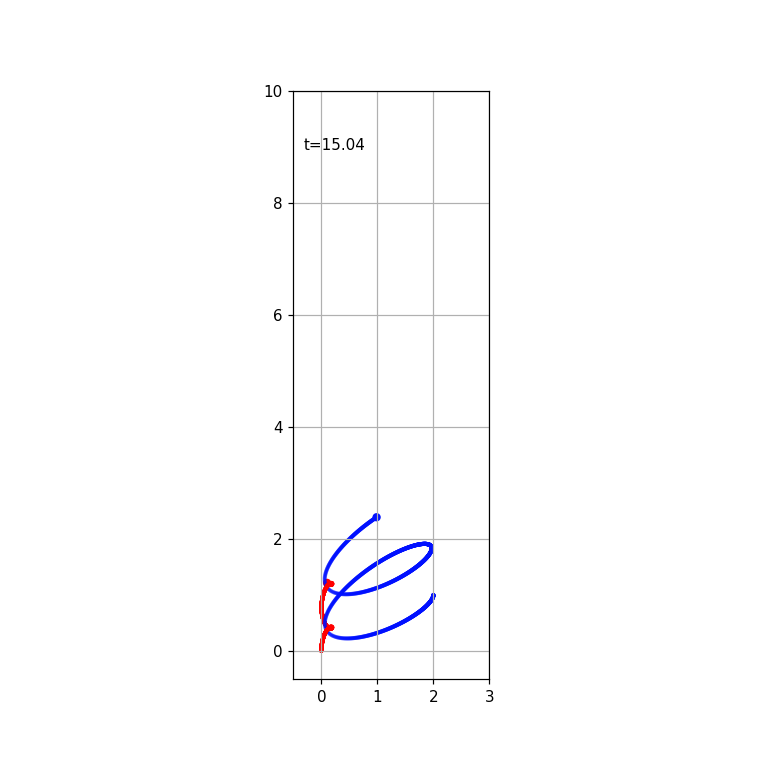

In [18]:
%matplotlib notebook
N = 2
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = 20
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[0, 0], [2, 1]])
bodys['mass'] = np.asarray([10**10, 10**9])
bodys['vel'] = np.asarray([[0, 0.1], [0, -0.1]])

simulation = Simulation(bodys)
ani = animate_2d(simulation, simulation.step_r1, -0.5, 3, -0.5, 10)
plt.show()

Dla porównania animacja metodą 2 wygląda podobnie:

<IPython.core.display.Javascript object>


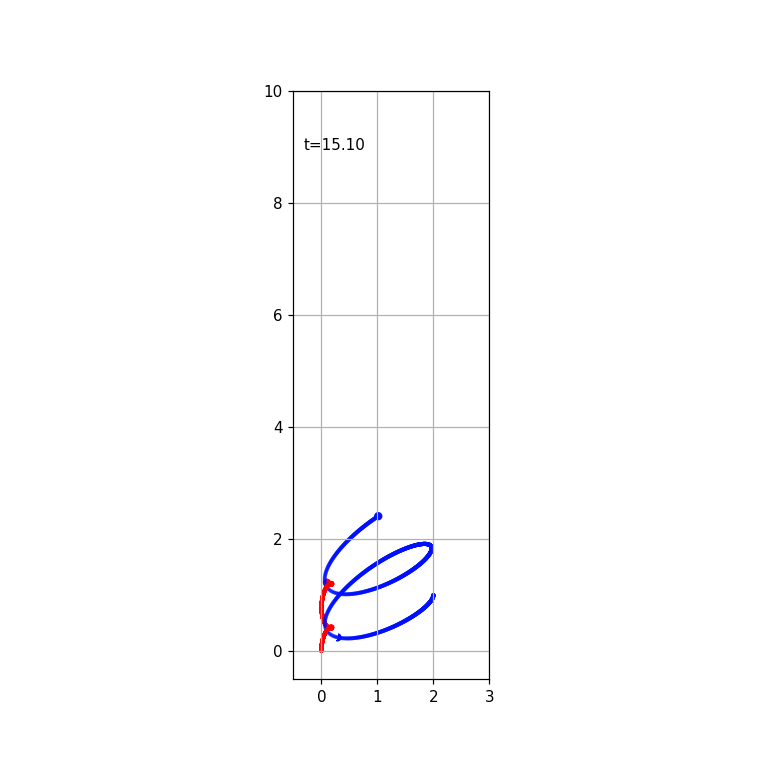

In [17]:
%matplotlib notebook
N = 2
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = 20
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[0, 0], [2, 1]])
bodys['mass'] = np.asarray([10**10, 10**9])
bodys['vel'] = np.asarray([[0, 0.1], [0, -0.1]])

simulation = Simulation(bodys)
ani = animate_2d(simulation, simulation.step_r2, -0.5, 3, -0.5, 10)
plt.show()

Podobnie jest z animacją wykonaną przy pomocy metody 3:

<IPython.core.display.Javascript object>


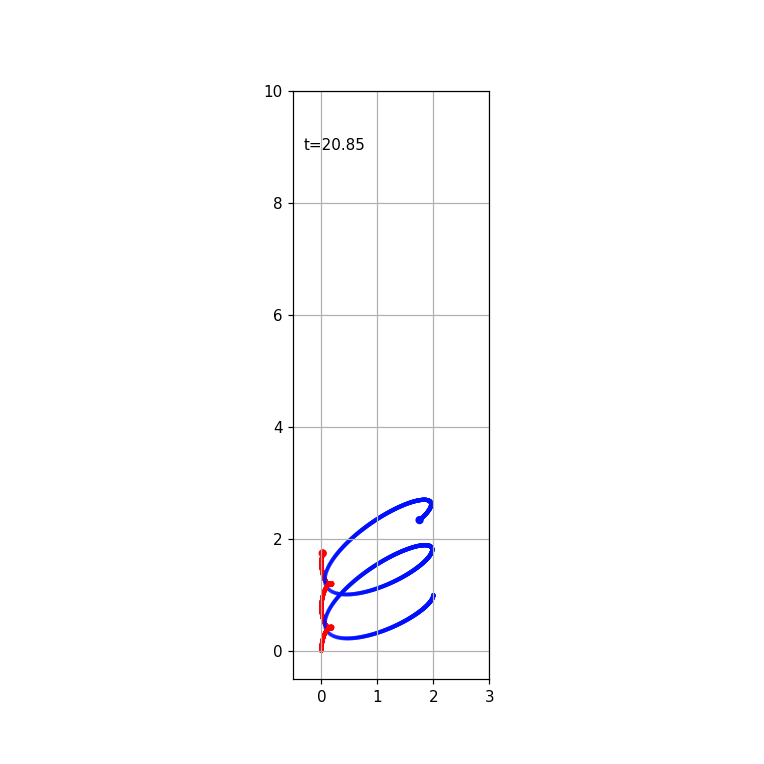

In [16]:
%matplotlib notebook
N = 2
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = 20
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[0, 0], [2, 1]])
bodys['mass'] = np.asarray([10**10, 10**9])
bodys['vel'] = np.asarray([[0, 0.1], [0, -0.1]])

simulation = Simulation(bodys)
ani = animate_2d(simulation, simulation.step_r4, -0.5, 3, -0.5, 10)
plt.show()

W następnych przykładach animacje będziemy pokazywać tylko za pomocą jednej metody ze względu na brak istotnych różnic między nimi. Domyślnie będzie to metoda 2.

#### Przykład 2

Ciało 1: masa = $10^{11}$, pozycja = $[0; 0]$, prędkość = $[0; 0,5]$

Ciało 2: masa = $10^{11}$, pozycja = $[1; 1]$, prędkość = $[0; -0,5]$

Kolejny przykład ilustruje ruch ciał o takiej samej masie i takiej samej co do wartości prędkości początkowej. Tory ruchów tych ciał są w kształcie elips. Poniżej wykres ruchu tych dwóch ciał utworzony metodą 4.

![SegmentLocal](dwa-przyklad2.png)

Poniżej animacja. Z animacji tej widać problem naszej metody - w chwili, gdy ciała są blisko siebie "pomiar danych" co jakiś czas nie jest wystarczający i ciała osiągają prędkości ucieczki nie powracając do swoich orbit.

<IPython.core.display.Javascript object>


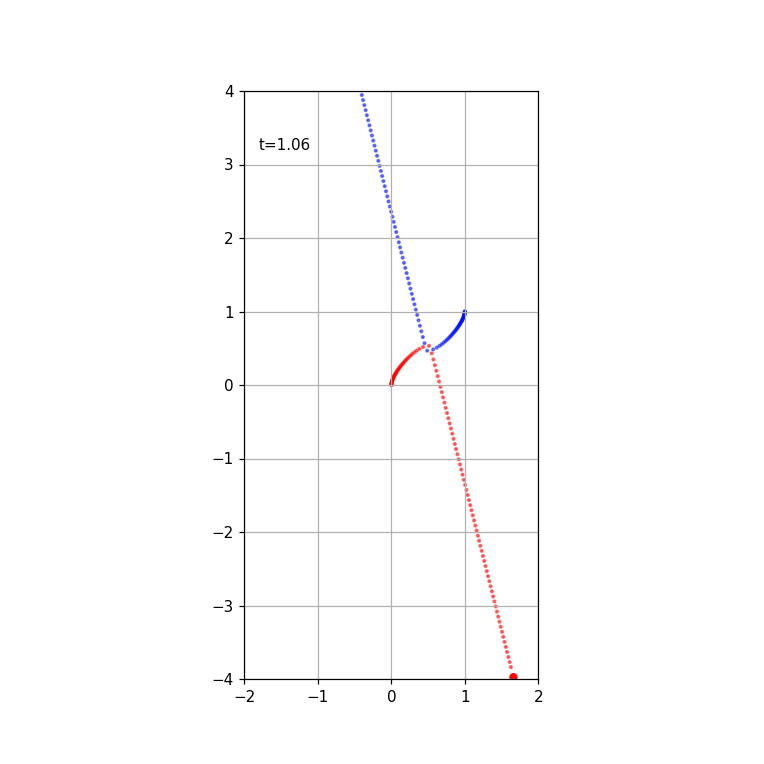

In [5]:
%matplotlib notebook
N = 2
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = 20
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[0, 0], [1, 1]])
bodys['mass'] = np.asarray([10**11, 10**11])
bodys['vel'] = np.asarray([[0, 0.5], [0, -0.5]])

simulation = Simulation(bodys)
ani = animate_2d(simulation, simulation.step_r2, -2, 2, -4, 4)
plt.show()

Spróbujmy trochę zmienić dane - nadać inne położenie początkowe.

<IPython.core.display.Javascript object>


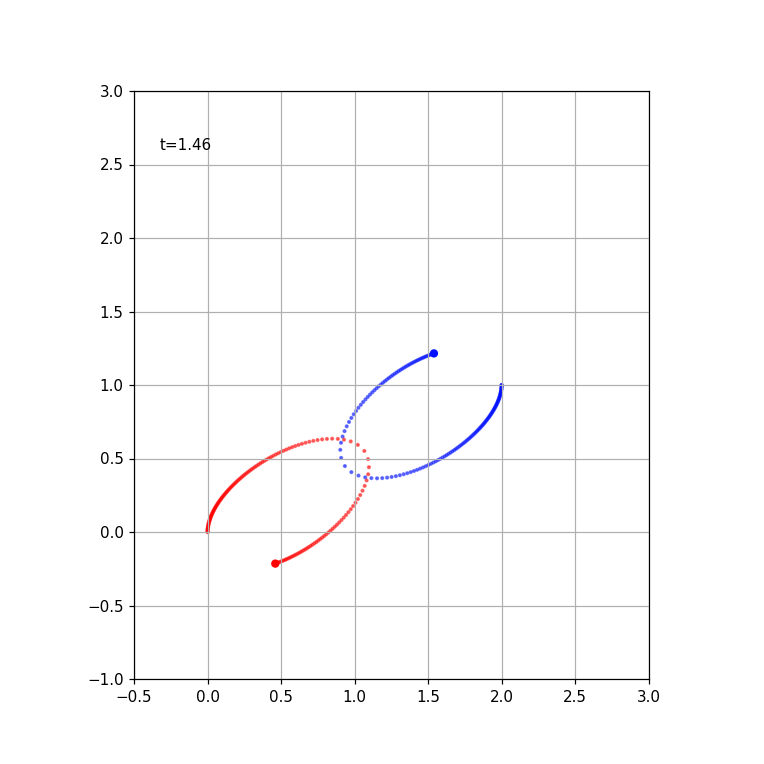

In [6]:
%matplotlib notebook
N = 2
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = 20
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[0, 0], [2, 1]])
bodys['mass'] = np.asarray([10**11, 10**11])
bodys['vel'] = np.asarray([[0, 0.5], [0, -0.5]])

simulation = Simulation(bodys)
ani = animate_2d(simulation, simulation.step_r2, -0.5, 3, -1, 3)
plt.show()

Natomiast metoda 3 prezentuje się następująco:

<IPython.core.display.Javascript object>


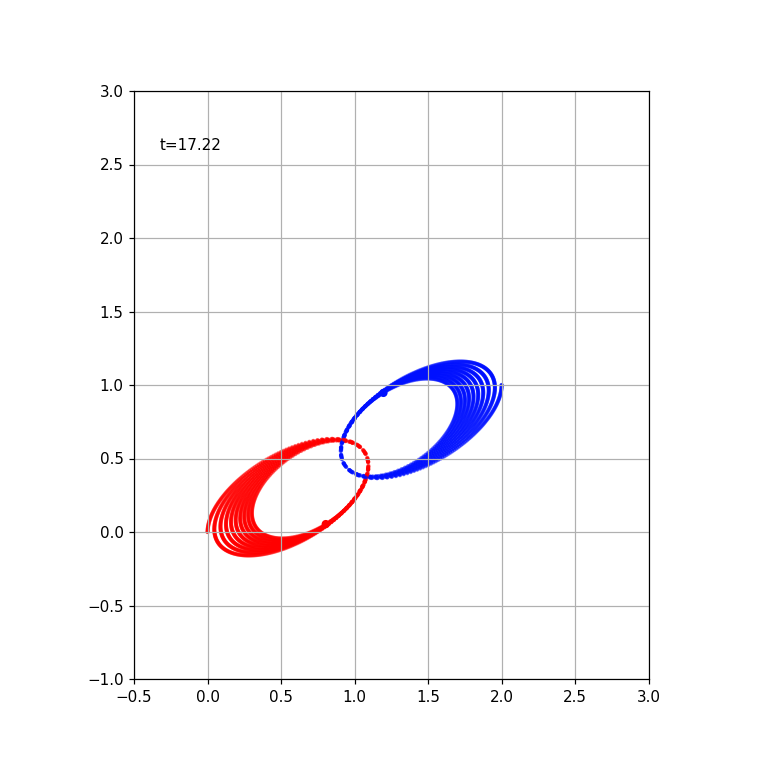

In [7]:
%matplotlib notebook
N = 2
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = 20
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[0, 0], [2, 1]])
bodys['mass'] = np.asarray([10**11, 10**11])
bodys['vel'] = np.asarray([[0, 0.5], [0, -0.5]])

simulation = Simulation(bodys)
ani = animate_2d(simulation, simulation.step_r4, -0.5, 3, -1, 3)
plt.show()

Jak widać nasze obiekty są dużo bliższe poruszania się po eliptycznych orbitach. Dla porównania w Mathematice otrzymujemy:

![SegmentLocal](dwa-przyklad2-2.png)

#### Przykład 3

Ciało 1: masa = $10^{10}$, pozycja = $[0; 0]$, prędkość = $[0; 0]$

Ciało 2: masa = $10^9$, pozycja = $[1; 1]$, prędkość = $[0; 0]$

Ciała bez prędkości początkowej poruszają się po prostej wyznaczonej przez ich środki mas. W rzeczywistym świecie najprawdopodobniej te ciała (planety) połączyłyby się ze sobą podczas zderzenia.

![SegmentLocal](dwa-przyklad3.png)

<IPython.core.display.Javascript object>


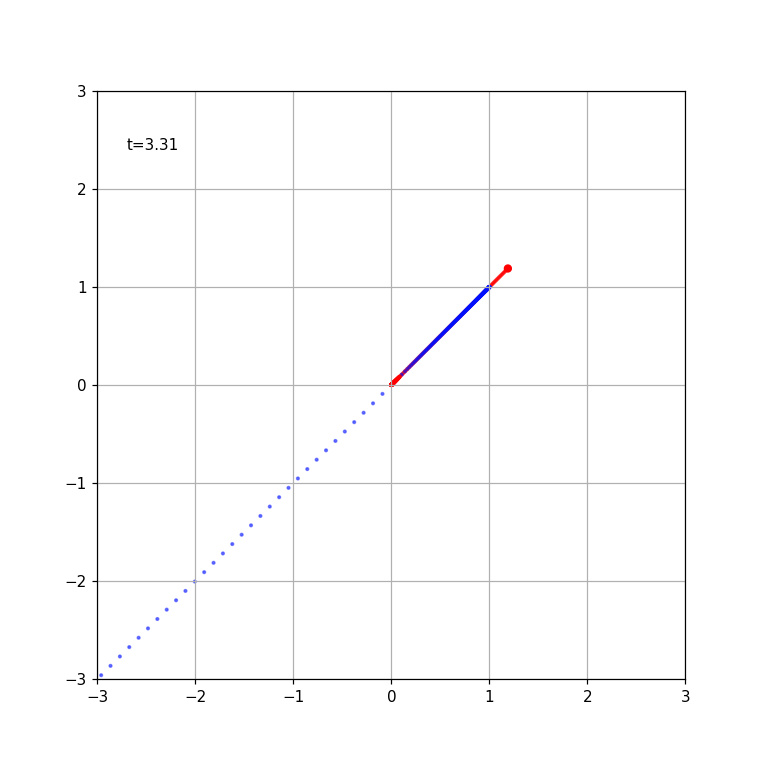

In [8]:
%matplotlib notebook
N = 2
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = 20
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[0, 0], [1, 1]])
bodys['mass'] = np.asarray([10**10, 10**9])
bodys['vel'] = np.asarray([[0, 0], [0, 0]])

simulation = Simulation(bodys)
ani = animate_2d(simulation, simulation.step_r2, -3, 3, -3, 3)
plt.show()

### Trzy ciała

#### Przykład 1

Ciało 1: masa = $2 \cdot 10^{10}$, pozycja = $[0; 0]$, prędkość = $[0; 0,01]$

Ciało 2: masa = $10^{10}$, pozycja = $[0.5; 1,2]$, prędkość = $[0; 0,02]$

Ciało 3: masa = $10^{10}$, pozycja = $[0.7; 1,5]$, prędkość = $[0; -0,02]$

Oto co otrzymaliśmy w Mathematice:

![SegmentLocal](trzy-przyklad1.png)

Natomiast to, co otrzymaliśmy przy pomocy naszej metody, wygląda następująco:

<IPython.core.display.Javascript object>


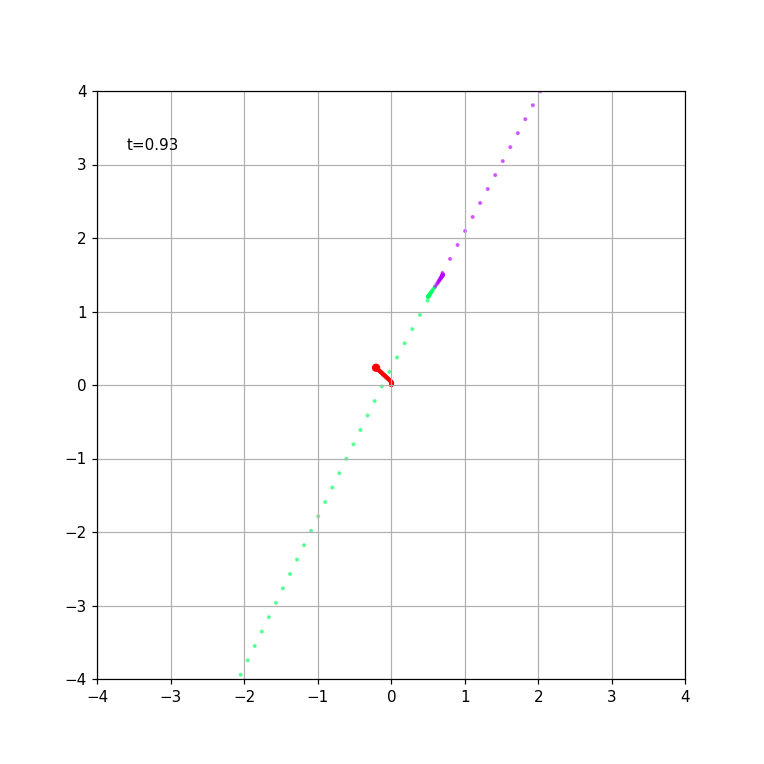

In [9]:
%matplotlib notebook
N = 3
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = 20
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[0, 0], [0.5, 1.2], [0.7, 1.5]])
bodys['mass'] = np.asarray([2*10**10, 10**10, 10**10])
bodys['vel'] = np.asarray([[0, 0.01], [0, 0.02], [0,-0.02]])

simulation = Simulation(bodys)
ani = animate_2d(simulation, simulation.step_r2, -4, 4, -4, 4)
plt.show()

Jak widać na naszej animacji, metoda 2 nie daje sobie dobrze rady z tym przykładem.

#### Przykład 2

Ciało 1: masa = $2\cdot 10^{10}$, pozycja = $[0; 0]$, prędkość = $[0; 0,01]$

Ciało 2: masa = $10^{10}$, pozycja = $[0,4; 1,2]$, prędkość = $[0; 0,02]$

Ciało 3: masa = $10^{10}$, pozycja = $[0,7; 1,5]$, prędkość = $[0; -0,02]$

Wykres otrzymany w Mathematice:

![SegmentLocal](trzy-przyklad2.png)

Oraz nasza animacja:

<IPython.core.display.Javascript object>


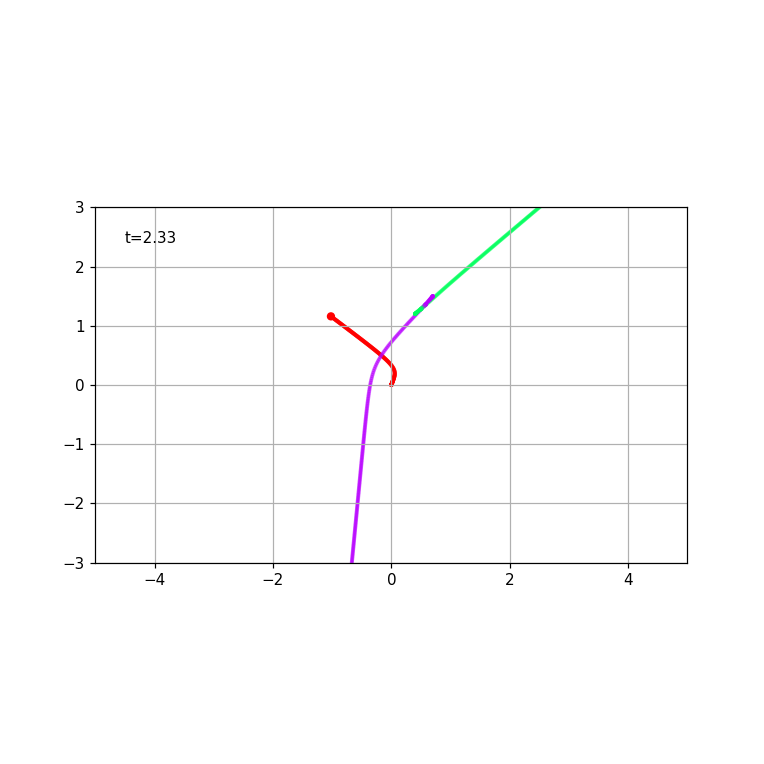

In [10]:
%matplotlib notebook
N = 3
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = 20
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[0, 0], [0.4, 1.2], [0.7, 1.5]])
bodys['mass'] = np.asarray([2*10**10, 10**10, 10**10])
bodys['vel'] = np.asarray([[0, 0.01], [0, 0.02], [0,-0.02]])

simulation = Simulation(bodys)
ani = animate_2d(simulation, simulation.step_r2, -5, 5, -3, 3)
plt.show()

Również i w tym przykładzie animacja nie wychodzi zgodnie z zamierzeniem. To dodatkowo udowadnia, jak bardzo problem n-ciał jest wrażliwy na błędy metod w wielu przypadkach.

Przykład 1 i 2 różnią się niewiele w danych. Patrząc na wykresy utworzone przy pomocy Mathematici, widzimy, że w pierwszym przykładzie nasze trzy ciała zaczynają się od siebie oddalać, dwa z nich w sposób schematyczny jako dwa ciała oddziałujące ze sobą. Natomiast w drugim przykładzie, ruchy naszych ciał od początku są chaotyczne. 

#### Przykład 3 - "The eight" <a href=https://people.ucsc.edu/~rmont/Nbdy.html>*[6]*</a> 

Nieoczekiwane i interesujące rozwiązanie problemu trzech ciał występuje, gdy cząstki o równych masach podążają po orbicie w kształcie ósemki, tą samą drogą wokół środka masy. Wyjątkowo w tym przykładzie $G=1$.

Ciało 1: masa = $1$, pozycja = $[-0,97000436; 0,24308753]$, prędkość = $[-0,466204685; -0,43236573]$

Ciało 2: masa = $1$, pozycja = $[0,97000436; -0,24308753]$, prędkość = $[-0,466204685; -0,43236573]$

Ciało 3: masa = $1$, pozycja = $[0; 0]$, prędkość = $[0,93240737; 0,86473146]$

$G = 1$

<IPython.core.display.Javascript object>


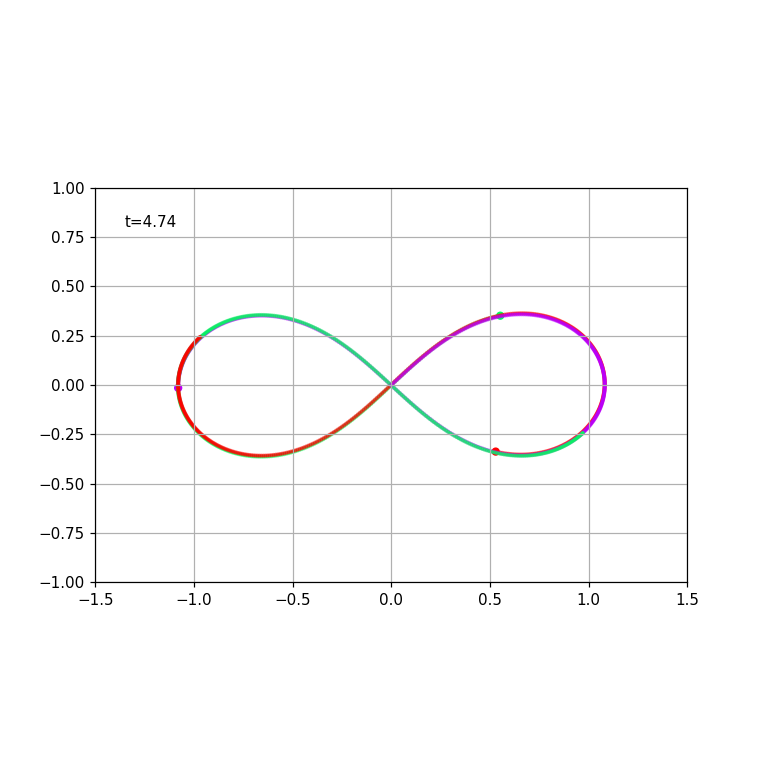

In [13]:
%matplotlib notebook
N = 3
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = 20
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[-0.97000436, 0.24308753], [0.97000436, -0.24398753], [0,0]])
bodys['mass'] = np.asarray([1,1,1])
bodys['vel'] = np.asarray([[-0.466203685, -0.43236573], [-0.466203685, -0.43236573], [0.93240737, 0.86473146]])

simulation = Simulation(bodys, G=1)
ani = animate_2d(simulation, simulation.step_r4, -1.5, 1.5, -1, 1, steps=1, dt=0.01)
plt.show()

#### Przykład 4

Trzy ciała mogą również tworzyć układy krążące wokół wspólnego środka masy.

Ciało 1: masa = $2 \cdot 10^{30}$, pozycja = $[0; 0] $, prędkość = $[0; 0]$

Ciało 2: masa = $0,33 \cdot 10^{24}$, pozycja = $[0; 57,9 \cdot 10^{9}]$, prędkość = $[47400; 0]$

Ciało 3: masa = $4,87 \cdot 10^{24}$, pozycja = $[0; 108,2 \cdot 10^{9}]$, prędkość = $[35000; 0]$

<IPython.core.display.Javascript object>


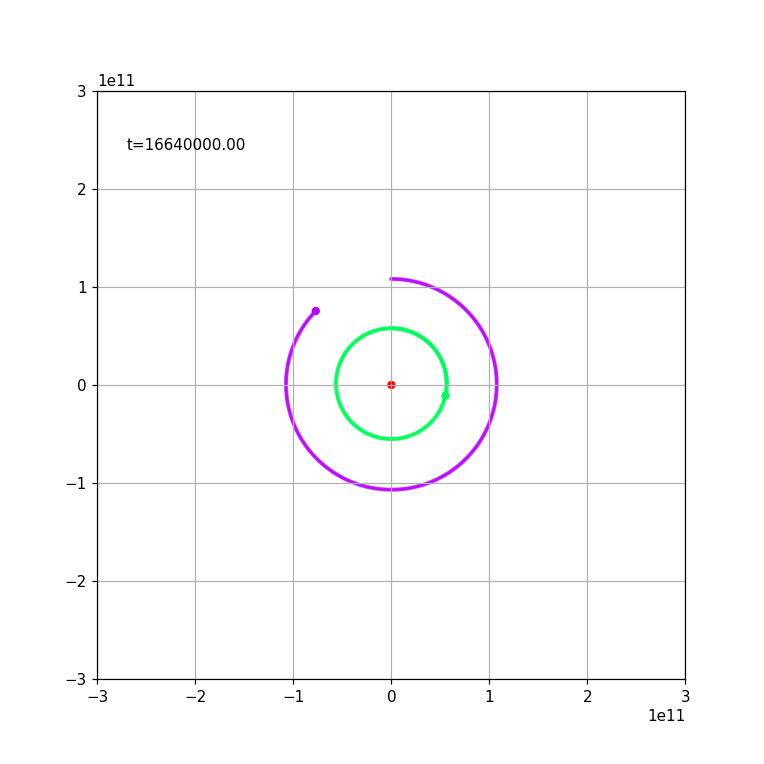

In [15]:
%matplotlib notebook
N = 3
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = 20
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[0, 0], [0, 57.9*10**9], [0, 108.2*10**9]])
bodys['mass'] = np.asarray([2*10**30, 0.33*10**24, 4.87*10**24])
bodys['vel'] = np.asarray([[0, 0], [47400, 0], [35000,0]])

simulation = Simulation(bodys)
ani = animate_2d(simulation, simulation.step_r4, -3*10**11, 3*10**11, -3*10**11, 3*10**11, steps=10, dt=40000)
plt.show()

### Układ Słoneczny

Korzystając z danych dotyczących planet krążacych wokół Słońca, postanowiłyśmy zwizualizować fragment naszego Układu Słonecznego metodą 3. <a href=https://nssdc.gsfc.nasa.gov/planetary/factsheet/>[7]</a> <a href=http://orion.pta.edu.pl/slonce-w-liczbach>[8]</a> 

Słońce: masa = $2 \cdot 10^{30}$, pozycja = $[0; 0] $, prędkość = $[0; 0]$

Merkury: masa = $0,33 \cdot 10^{24}$, pozycja = $[0; 57,9 \cdot 10^{9}]$, prędkość = $[47400; 0]$

Wenus: masa = $4,87 \cdot 10^{24}$, pozycja = $[0; 108,2 \cdot 10^{9}]$, prędkość = $[35000; 0]$

Ziemia: masa = $5,97 \cdot 10^{24}$, pozycja = $[0; 149,6 \cdot 10^{9}]$, prędkość = $[29800; 0]$

Mars: masa = $0,642 \cdot 10^{24}$, pozycja = $[0; 228 \cdot 10^{9}]$, prędkość = $[24100; 0]$


<IPython.core.display.Javascript object>


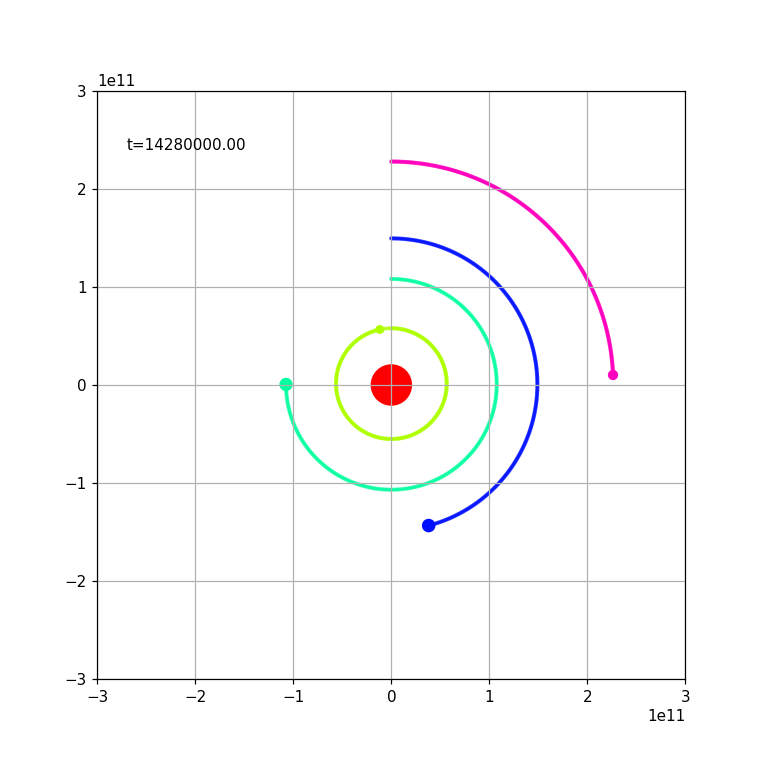

In [12]:
%matplotlib notebook
N = 5
dims = 2

colors = plt.cm.get_cmap('hsv', N*2)
colors = [colors(i*2) for i in range(N)]

bodys = np.zeros(N, dtype=[('pos', float, (dims,)),
                                ('mass',    float),
                                ('r',    int),
                                ('vel',     float, (dims,)),
                                ('color',   float, (4,))])

bodys['r'] = np.asarray([695, 24.4, 60.52, 63.78, 33.96])
bodys['color'] = np.array(colors)
bodys['pos'] = np.asarray([[0, 0], [0, 57.9*10**9], [0, 108.2*10**9], [0, 149.6*10**9], [0, 228*10**9]])
bodys['mass'] = np.asarray([2*10**30, 0.33*10**24, 4.87*10**24, 5.97*10**24, 0.642*10**24])
bodys['vel'] = np.asarray([[0, 0], [47400, 0], [35000,0], [29800,0], [24100, 0]])

simulation = Simulation(bodys)
ani = animate_2d(simulation, simulation.step_r4, -3*10**11, 3*10**11, -3*10**11, 3*10**11, steps=10, dt=40000)
plt.show()

## Nasze spostrzeżenia i uwagi

Metody 1-3 nie zawsze dają dobre wyniki torów ruchów ciał. Nadają się do stosowania w mniej szczególnych i czułych na dane wejściowe przypadkach. W teorii zmniejszając $dt$ otrzymalibyśmy lepsze przybliżenie torów ruchu, jednak znacząco zwiększa to ilość obliczeń, a tym samym czas działania.

## Podsumowanie

Na powyższych rysunkach możemy zobaczyć pewne schematy. Dwa obiekty łatwo odnajdują harmonię i poruszają się w przewidywalny sposób, zarysowując swoim ruchem powtarzalny wzór elips. Tak naprawdę, właśnie czegoś takiego się spodziewamy. Inaczej jest, gdy rozważamy problem dla trzech ciał. Już Izaak Newton dostrzegł, że przypadek trzech ciał jest szczególny i ciała te, nie zawsze poruszają się schematycznie. Stwierdzono, że o ile dwa obiekty zachowują się w sposób przewidywalny, tworząc regularne orbity, o tyle trzech obiektów nie potrafimy ująć w stały wzór. W związku z tym problem ruchu trzech oraz większej liczby ciał jest zagadnieniem trudniejszym i właściwie nie jest możliwe rozwiązanie go poprzez znalezienie całek pierwszych układu.

## Bibliografia

[1] https://oxford.universitypressscholarship.com/view/10.1093/oso/9780198786399.001.0001/oso-9780198786399-chapter-13

[2] Ł. Płociniczak, Ordinary differential equations in science and technology, 2021, s. 85. 

[3] https://tutorial.math.lamar.edu/classes/de/eulersmethod.aspx

[4] http://www.rose.pwr.wroc.pl/met_numer/MN_notatki.pdf, s. 53.

[5] https://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node5.html

[6] https://people.ucsc.edu/~rmont/Nbdy.html

[7] https://nssdc.gsfc.nasa.gov/planetary/factsheet/

[8] http://orion.pta.edu.pl/slonce-w-liczbach